## <b style='color: blue'>Importing the Dependencies</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## <b style='color: blue'>Data Collection and Processing</b> 

####  <b style='color: red'>Importing the data</b>

In [2]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('C:/Users/AA/Downloads/heart.csv')

####  <b style='color: red'>identifying the shape of data</b>

In [3]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [4]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### <b style='color: red'>Plotting the matrix correlation</b>

<AxesSubplot:>

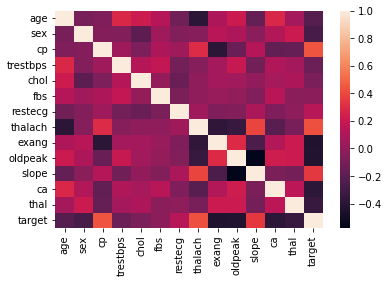

In [8]:
import seaborn as sns

sns.heatmap(heart_data.corr())

<b style='color: red'>Identifing missing values</b>

In [9]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

##### <b style='color: green'>Plotting the missing values</b>

<AxesSubplot:>

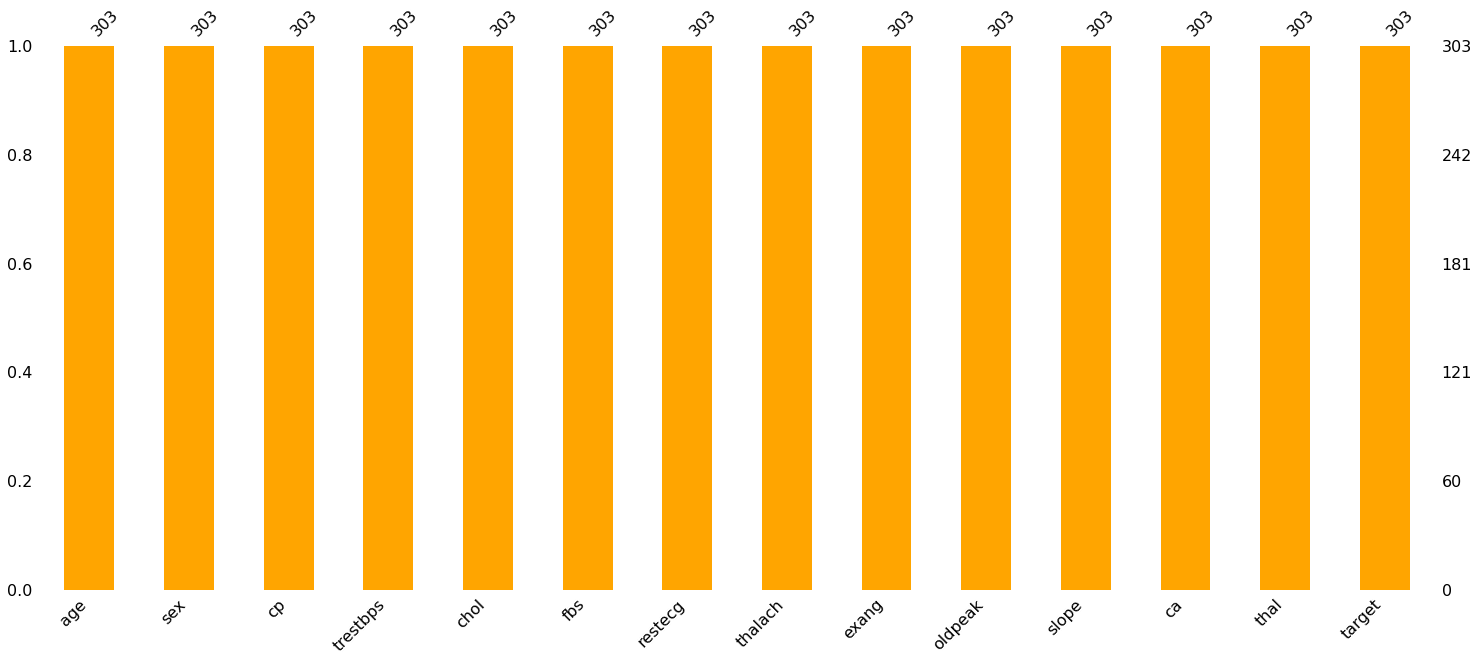

In [10]:
import missingno as ms

ms.bar(heart_data, color='orange')

##### <b style='color: green'>Plotting the box-plot</b>

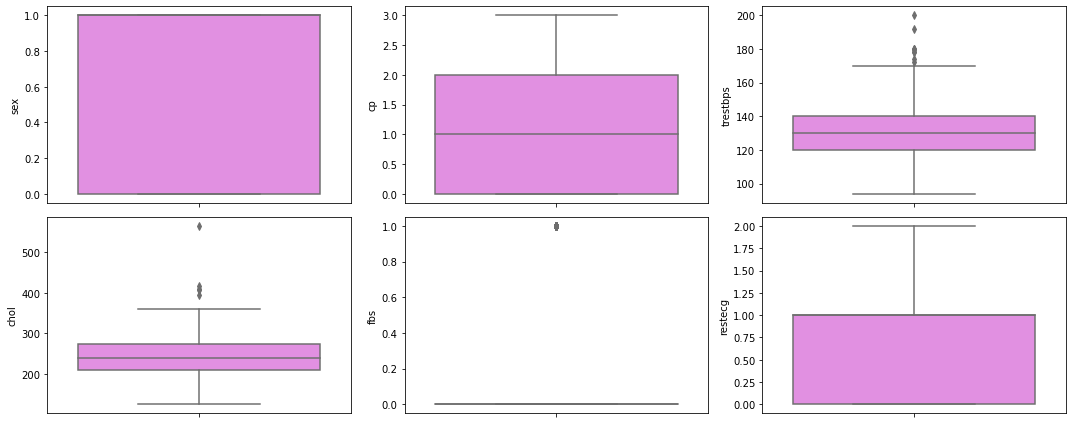

In [11]:
import seaborn as sns

train_int_data = list(heart_data.select_dtypes(include=['integer','float64']))
plt.figure(figsize=(15, 6))

for i in range(1,7):
    plt.subplot(2, 3, i)
    sns.boxplot(y=heart_data[train_int_data[i]],color='violet',orient='v')
    plt.tight_layout()

<b style='color: red'>Output Distribution</b>

In [12]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

##### <b style='color: green'>Plotting the distrubution</b>

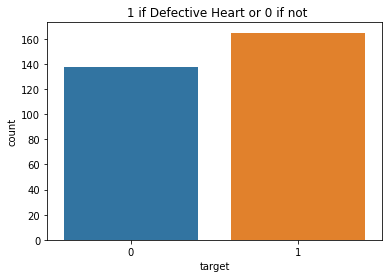

In [13]:
sns.countplot(x=heart_data['target'])
plt.title(" 1 if Defective Heart or 0 if not", fontsize=12)
plt.show()

### <b style='color: red'>Infos about people which have Defective Heart</b>

In [14]:
heart_data[heart_data['target']==1].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0
mean,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212,1.0
std,9.550651,0.497444,0.952222,16.169613,53.552872,0.347412,0.504818,19.174276,0.347412,0.780683,0.593635,0.848894,0.465752,0.0
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,44.000000,0.000000,1.000000,120.000000,208.000000,0.000000,0.000000,149.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.0
50%,52.000000,1.000000,2.000000,130.000000,234.000000,0.000000,1.000000,161.000000,0.000000,0.200000,2.000000,0.000000,2.000000,1.0
75%,59.000000,1.000000,2.000000,140.000000,267.000000,0.000000,1.000000,172.000000,0.000000,1.000000,2.000000,0.000000,2.000000,1.0
max,76.000000,1.000000,3.000000,180.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,2.000000,4.000000,3.000000,1.0


##### <b style = 'color:green'> Plotting the results </b>

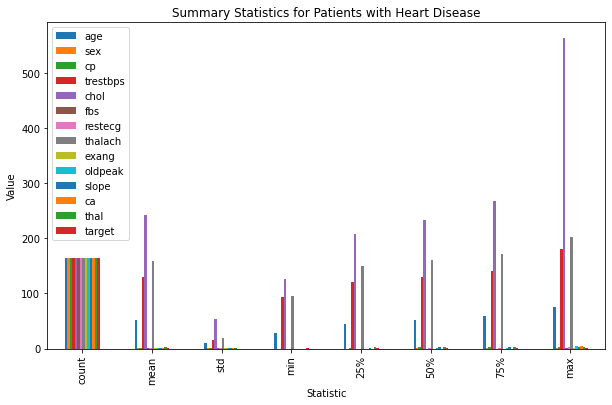

In [15]:
heart_disease_data_1 = heart_data[heart_data['target'] == 1]

# Generate summary statistics for the filtered data
heart_disease_summary = heart_disease_data_1.describe()

# Plot the summary statistics
heart_disease_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Summary Statistics for Patients with Heart Disease')
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.show()

### <b style='color: red'>Infos about people which have Healthy Heart</b>

In [16]:
heart_data[heart_data['target']==0].describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.0
mean,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478,0.0
std,7.962082,0.380416,0.905920,18.729944,49.454614,0.367401,0.541321,22.598782,0.499232,1.300340,0.561324,1.043460,0.684762,0.0
min,35.000000,0.000000,0.000000,100.000000,131.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,52.000000,1.000000,0.000000,120.000000,217.250000,0.000000,0.000000,125.000000,0.000000,0.600000,1.000000,0.000000,2.000000,0.0
50%,58.000000,1.000000,0.000000,130.000000,249.000000,0.000000,0.000000,142.000000,1.000000,1.400000,1.000000,1.000000,3.000000,0.0
75%,62.000000,1.000000,0.000000,144.750000,283.000000,0.000000,1.000000,156.000000,1.000000,2.500000,1.750000,2.000000,3.000000,0.0
max,77.000000,1.000000,3.000000,200.000000,409.000000,1.000000,2.000000,195.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.0


##### <b style = 'color:green'> Plotting the results </b>

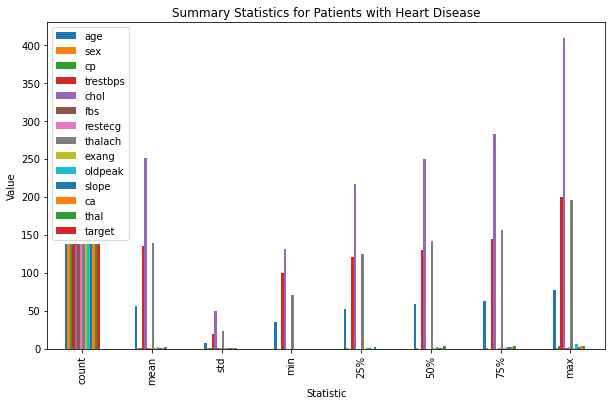

In [17]:
heart_disease_data_1 = heart_data[heart_data['target'] == 0]

# Generate summary statistics for the filtered data
heart_disease_summary = heart_disease_data_1.describe()

# Plot the summary statistics
heart_disease_summary.plot(kind='bar', figsize=(10, 6))
plt.title('Summary Statistics for Patients with Heart Disease')
plt.xlabel('Statistic')
plt.ylabel('Value')
plt.show()

### <b style='color: red'>Group the DataFrame by the sex</b> 

In [18]:
heart_data.groupby(["sex"])["target"].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

This code is used to group the heart_data DataFrame by the sex column and count the number of occurrences of each value in the target column for each group.

##### <b style = 'color:green'> Plotting the distribution </b>

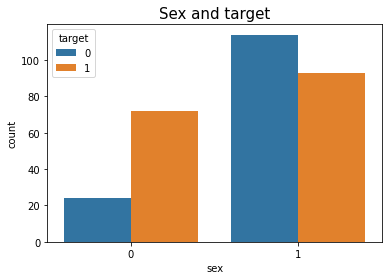

In [19]:
sns.countplot(x=heart_data["sex"], hue=heart_data["target"])
plt.title("Sex and target", fontsize=15)
plt.show()

### <b style='color: red'>Splitting the Features and Target</b>  

In [20]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

### <b style='color: red'> Splitting the Data into Training data & Test Data</b> 

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


### <b style='color: red'>Normalize data with StandardScaler</b>

In [23]:
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

## <b style='color: blue'>Model Training</b> 

## <b style='color: green'>KNN (K-NEAREST NEIGHBOR)</b>

##### <b style = 'color:green'> Plot the testing accuracy of the KNN classifier for each value of k </b>

Maximum accuracy score: 0.819672131147541
Value of k with maximum accuracy score: 6


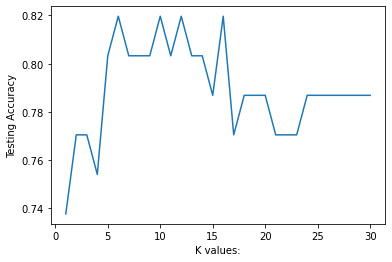

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = list(range(1, 31))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    predictions_knn = knn.predict(X_test)
    scores.append(metrics.accuracy_score(Y_test, predictions_knn))

plt.plot(k_range, scores)
plt.xlabel('K values:')
plt.ylabel('Testing Accuracy')

# Find the maximum accuracy score and corresponding value of k
max_score = max(scores)
max_k = k_range[np.argmax(scores)]
print("Maximum accuracy score:", max_score)
print("Value of k with maximum accuracy score:", max_k)

#### <b style = 'color:red'> Training the model with n_neighbors = 6 based on the plot</b>

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Créer un pipeline de prétraitement et de modèle
pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=6))

# Utiliser la validation croisée pour évaluer les performances du modèle
scores_knn = cross_val_score(pipe_knn, X, Y, cv=5)

<b style = 'color:crimson'>Accuracy Score</b>

In [36]:
# Afficher les scores de validation croisée
print('Cross-validation scores:', scores_knn)
print('Mean cross-validation score:', scores_knn.mean())

Cross-validation scores: [0.83606557 0.86885246 0.83606557 0.85       0.71666667]
Mean cross-validation score: 0.8215300546448088


SVM

In [28]:
# Check default values
from sklearn import svm

model_svm = svm.SVC()
params = model_svm.get_params()
params_df = pd.DataFrame(params, index=[0])
params_df.T

,0
C,1.0
break_ties,False
cache_size,200
class_weight,None
coef0,0.0
decision_function_shape,ovr
degree,3
gamma,scale
kernel,rbf
max_iter,-1


In [43]:
# Run model
model_svm.fit(X_train, Y_train)
# Accuracy score
print(f'The accuracy score of svm model before tuning the parameters is {model_svm.score(X_test, Y_test):.4f}')

The accuracy score of svm model before tuning the parameters is 0.7869


In [44]:
from sklearn import svm
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV, StratifiedKFold


parametres_svm = {'C':[-1,0.1,1,3,5], 
               'gamma': [1, 0.1, 0.01, 0.001],
               'kernel':['rbf','poly']}

kfold_cv = StratifiedKFold(n_splits=3, random_state= 0, shuffle=True)
# StratifiedKFold is used for the cross-validation. It helps us keep the 
# class ratio in the folds the same as the training dataset. 
# n_splits=3 means we are doing 3-fold cross-validation. 
# shuffle=True means the data are shuffled before splitting. 
# random_state=0 makes the shuffle reproducible.

In [46]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV,cross_val_score
scoring = ['accuracy']

grid_search = GridSearchCV(estimator=model_svm, 
                           param_grid=parametres_svm, 
                           scoring=scoring, 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=kfold_cv, 
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(X_train, Y_train)
# Print grid search summary
grid_result

C:\Users\AA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
24 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\AA\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 251, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\Users\AA\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 333, in _dense_fit
    ) = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 192, 

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [-1, 0.1, 1, 3, 5],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly']},
             refit='accuracy', scoring=['accuracy'])

In [48]:
# Print the best accuracy score for the training dataset
print(f'The best accuracy score for the training dataset is {grid_result.best_score_:.4f}')
# Print the hyperparameters for the best score
print(f'The best hyperparameters for svm model are {grid_result.best_params_}')
# Print the best accuracy score for the testing dataset
print(f'The accuracy score for the testing dataset is {grid_search.score(X_test, Y_test):.4f}')

The best accuracy score for the training dataset is 0.8513
The best hyperparameters for svm model are {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
The accuracy score for the testing dataset is 0.7869


## <b style='color: green'>XGBClassifier</b>

In [25]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialiser les modèles XGBoost et Random Forest
xgb = XGBClassifier()
rf = RandomForestClassifier()

# Entraîner les modèles sur l'ensemble d'entraînement
xgb.fit(X_train, Y_train)
rf.fit(X_train, Y_train)

# Évaluer les performances des modèles sur l'ensemble de test
xgb_score = xgb.score(X_test, Y_test)
rf_score = rf.score(X_test, Y_test)

# Afficher les scores des modèles
print('XGBoost score:', xgb_score)

XGBoost score: 0.7704918032786885
Random Forest score: 0.7540983606557377


## <b style='color: green'>RandomForestClassifier</b>

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# Créer un pipeline de prétraitement et de modèle
pipe = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, max_depth=5))

# Utiliser la validation croisée pour évaluer les performances du modèle
scores = cross_val_score(pipe, X, Y, cv=5)

# Afficher les scores de validation croisée
print('Cross-validation scores:', scores)
print('Mean cross-validation score:', scores.mean())

Cross-validation scores: [0.80327869 0.8852459  0.78688525 0.81666667 0.75      ]
Mean cross-validation score: 0.8084153005464481


we have been experimenting with different supervised learning algorithms and have found that KNN is the most suitable for your data. An accuracy score of 0.8215 is quite good

## <b style='color: blue'>Saving the trained model</b> 

In [37]:
import pickle

In [38]:
filename = 'heart_disease_model.sav'
pickle.dump(pipe_knn, open(filename, 'wb'))

In [39]:
# loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [40]:
for column in X.columns:
    print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
